In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']


# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Print the balanced class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    523
3    427
2     43
1      7
Name: learning_style, dtype: int64
Resampled class distribution: 0    523
3    523
2    523
1    523
Name: learning_style, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None,'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model with best hyperparameters on the test set
best_classifier = grid_search.best_estimator_
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Hyperparameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.8117025650192152
Test Accuracy:  0.7637231503579952


In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[ 75   0   7  25]
 [  0  94   1   0]
 [  3   0 101   8]
 [ 28   2   4  71]]


0.8138424821002387

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

Accuracy of DT 0.8138424821002387
F1 score of DT 0.8156941938541299




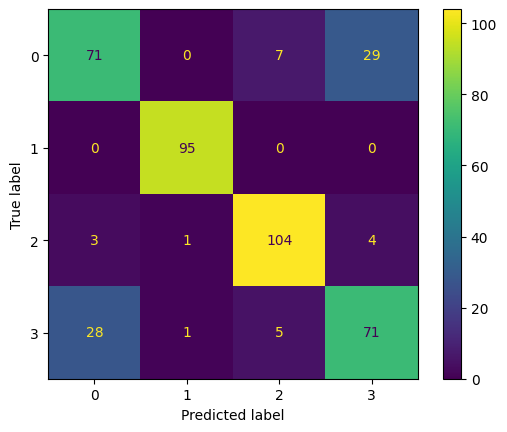

In [ ]:


model = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train, y_train)
pred_dt=model.predict(X_test)
score_dt=accuracy_score(y_test,pred_dt)
f1_dt = f1_score(pred_dt, y_test, average="weighted")

print('Accuracy of DT',score_dt)
print('F1 score of DT',f1_dt)
print("\n")

cm = confusion_matrix(y_test, pred_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have predicted labels stored in `y_pred` and true labels stored in `y_true`
print(classification_report(y_test, pred_dt, zero_division=0))


              precision    recall  f1-score   support

           0       0.70      0.66      0.68       107
           1       0.98      1.00      0.99        95
           2       0.90      0.93      0.91       112
           3       0.68      0.68      0.68       105

    accuracy                           0.81       419
   macro avg       0.81      0.82      0.82       419
weighted avg       0.81      0.81      0.81       419



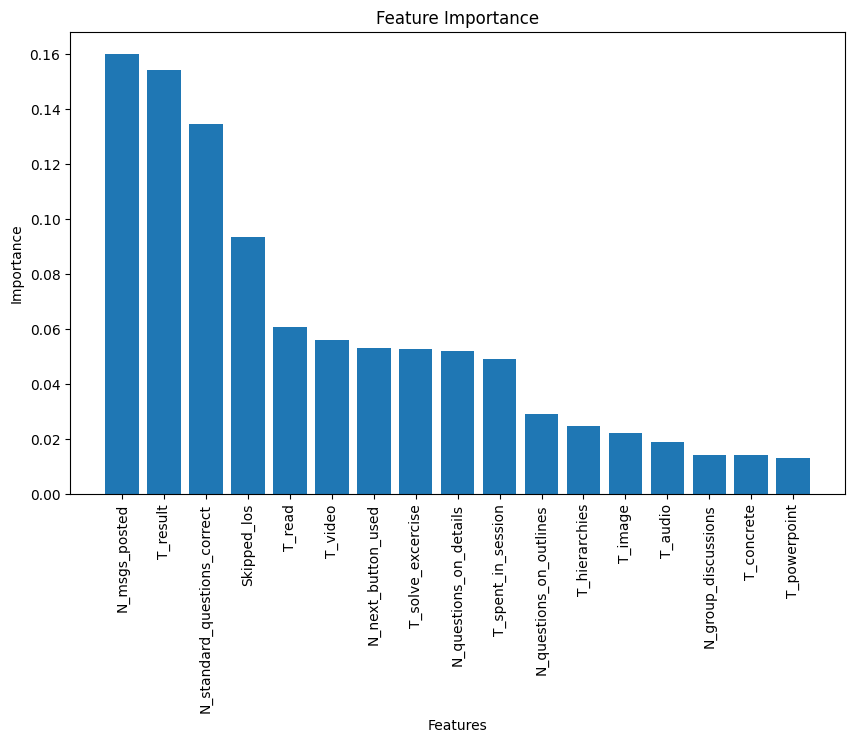

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create and train a decision tree classifier
tree_clf = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
tree_clf.fit(X_train, y_train)

# Get the feature importances
importance = tree_clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importance)[::-1]

# Arrange the feature names in the same order
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score




model = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)


# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Compute the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

print("Accuracy: {:.2f} %".format(cv_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(cv_scores.std()*100))


Cross-validation scores: [0.80298507 0.80298507 0.81492537 0.81437126 0.81736527]
Mean accuracy: 0.8105264098668336
Accuracy: 81.05 %
Standard Deviation: 0.62 %
